Librarires 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


Load training and test abalone data.

In [2]:
TRAIN = pd.read_csv("aba_train.csv")

TEST = pd.read_csv("aba_test.csv")

print(TRAIN.head())
print(TRAIN.shape)
print()
print(TEST.head())
print(TEST.shape)


   id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9  
(90615, 10)

      id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   M   0.645     0.475   0.155        1.2380          0.6185   
1  90616   M   0.580     0.460   0.160        0.9830          0.4785   
2  90617   M   0.560     0.420   0.140        0.8395          0.3525   
3  90618   M   0.570     0.490   0.145

Training data evaluation.

In [5]:
#summay stats
print(TRAIN.describe())
print()
print(TRAIN['Sex'].value_counts())

#any NaN Values...NO
print(TRAIN.isnull().sum())

#levels of categorical data
print(TRAIN['Sex'].unique())

                 id        Length      Diameter        Height  Whole weight  \
count  90615.000000  90615.000000  90615.000000  90615.000000  90615.000000   
mean   45307.000000      0.517098      0.401679      0.135464      0.789035   
std    26158.441658      0.118217      0.098026      0.038008      0.457671   
min        0.000000      0.075000      0.055000      0.000000      0.002000   
25%    22653.500000      0.445000      0.345000      0.110000      0.419000   
50%    45307.000000      0.545000      0.425000      0.140000      0.799500   
75%    67960.500000      0.600000      0.470000      0.160000      1.067500   
max    90614.000000      0.815000      0.650000      1.130000      2.825500   

       Whole weight.1  Whole weight.2  Shell weight         Rings  
count    90615.000000    90615.000000  90615.000000  90615.000000  
mean         0.340778        0.169422      0.225898      9.696794  
std          0.204428        0.100909      0.130203      3.176221  
min          0.0

One-hot encoding Sex variable.

In [6]:
TRAIN_NEW = pd.get_dummies(TRAIN, columns=['Sex'], drop_first=True)
TRAIN_NEW[['Sex_M', 'Sex_I']] = TRAIN_NEW[['Sex_M', 'Sex_I']].astype(int)

#Sex F is the reference column 
#False=0 and True=1 so if Sex_I and Sex_M are 0 then it is reference level F
print(TRAIN_NEW.head())

   id  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   0   0.550     0.430   0.150        0.7715          0.3285          0.1465   
1   1   0.630     0.490   0.145        1.1300          0.4580          0.2765   
2   2   0.160     0.110   0.025        0.0210          0.0055          0.0030   
3   3   0.595     0.475   0.150        0.9145          0.3755          0.2055   
4   4   0.555     0.425   0.130        0.7820          0.3695          0.1600   

   Shell weight  Rings  Sex_I  Sex_M  
0        0.2400     11      0      0  
1        0.3200     11      0      0  
2        0.0050      6      1      0  
3        0.2500     10      0      1  
4        0.1975      9      1      0  


Fitting first model.

Predicted Rings = 3.8469 + 20.7567 * (Shell weight) + 21.1566 * (Height) + 8.0525 * (Diameter) + -2.0755 * (Length) + 3.7713 * (Whole weight) + -15.8048 * (Whole weight.1) + -7.0188 * (Whole weight.2) + -0.0146 * (Sex_M) + -0.7170 * (Sex_I)

In [7]:
X = TRAIN_NEW[['Shell weight', 'Height', 'Diameter', 'Length', 'Whole weight', 'Whole weight.1', 'Whole weight.2',
               'Sex_M', 'Sex_I']].values
y=TRAIN_NEW[['Rings']].values

X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                 1.546e+04
Date:                Sat, 08 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:40:56   Log-Likelihood:            -1.9115e+05
No. Observations:               90615   AIC:                         3.823e+05
Df Residuals:                   90605   BIC:                         3.824e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8469      0.061     63.306      0.0

Assumption checks model 1

Linearity: Assumption failed for all predictors.

Independence: Passed no indication that one observation influences another, and not time ordered data so autocorrelation not a concern.

Equal Variance: Assumption failed due to the pattern in residual vs fitted plot where residual values decrease as fitted values increase. 

Normality of Residuals: Failed due to drastic deviation from red line in QQ-plot

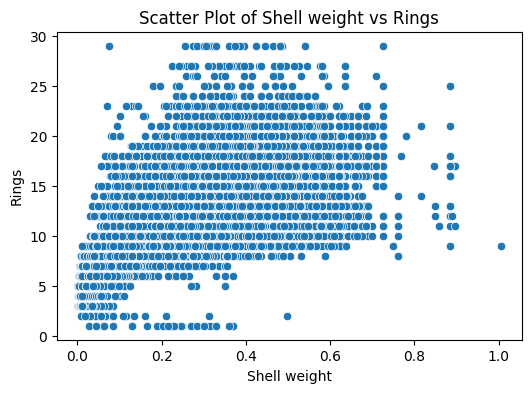

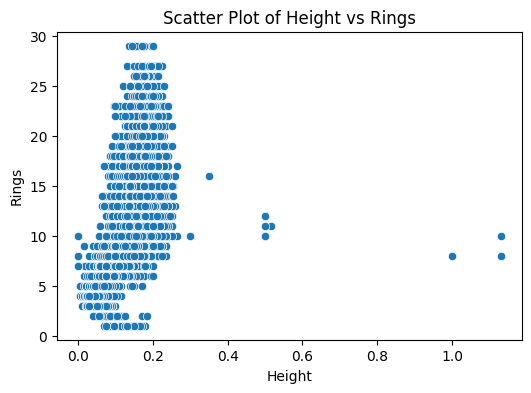

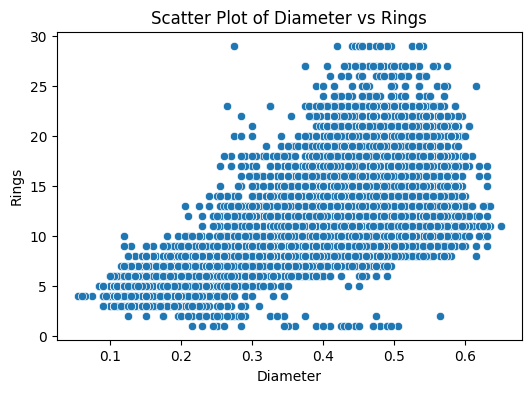

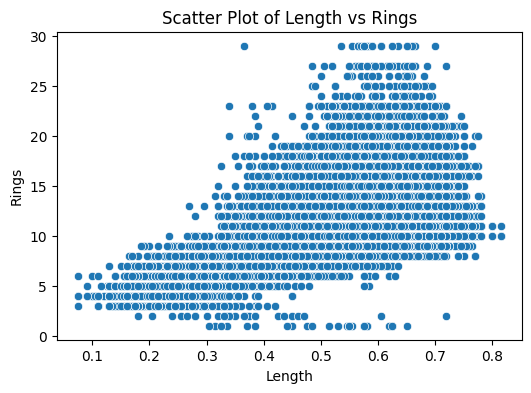

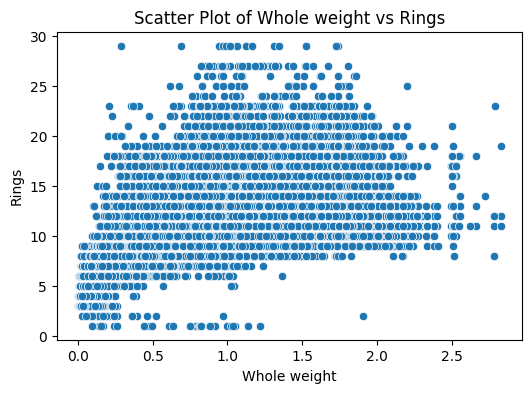

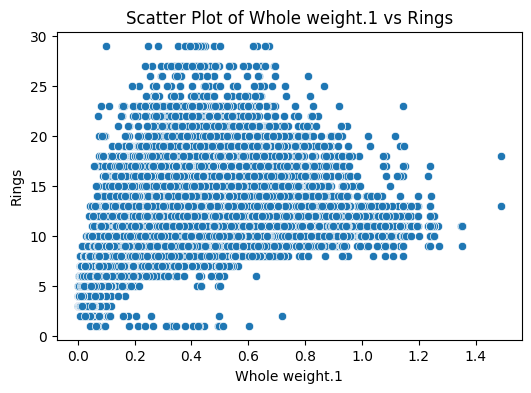

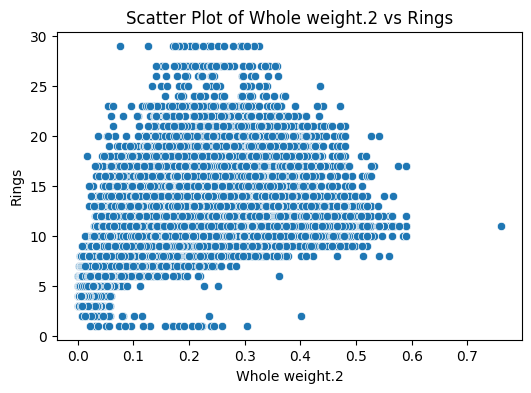

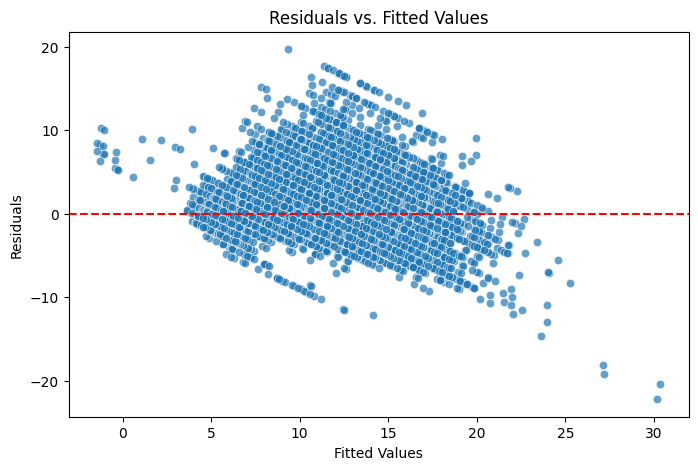

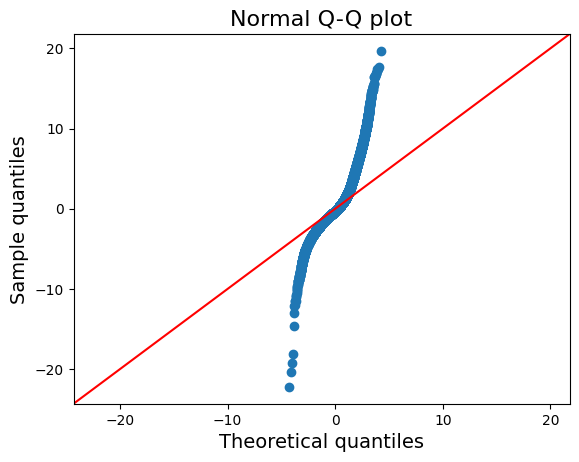

In [8]:
#Linearity Assumption

# predictors and variable of interest
X = TRAIN_NEW[['Shell weight', 'Height', 'Diameter', 'Length', 
               'Whole weight', 'Whole weight.1', 'Whole weight.2']]  
y = TRAIN_NEW['Rings']

# scatter plots
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=TRAIN_NEW[col], y=y)
    plt.xlabel(col)
    plt.ylabel('Rings')
    plt.title(f'Scatter Plot of {col} vs Rings')
    plt.show()

#Equal Variance Assumption
fitted_values = model.fittedvalues  
residuals = model.resid  

# Residuals vs. Fitted Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

#QQ-plot for Residuals
p=sm.qqplot(residuals,line='45')
plt.title('Normal Q-Q plot', fontsize=16);
plt.xlabel('Theoretical quantiles', fontsize=14);
plt.ylabel('Sample quantiles', fontsize=14);



Using model 1 on the test data to generate predictions.

In [9]:
# One-hot encode the test sex column
TEST_NEW = pd.get_dummies(TEST, columns=['Sex'], drop_first=True)
TEST_NEW[['Sex_M', 'Sex_I']] = TEST_NEW[['Sex_M', 'Sex_I']].astype(int)


X_test = TEST_NEW[['Shell weight', 'Height', 'Diameter', 'Length', 'Whole weight', 'Whole weight.1', 'Whole weight.2',
                   'Sex_M', 'Sex_I']].values

# Add constant 
X_test = sm.add_constant(X_test)

# Generate predictions for rings using model 1 negatives treated as 0
TEST_NEW['Rings'] = np.maximum(model.predict(X_test).round().astype(int), 0)

#Note the added rings column which is predicted with model 1
print(TEST_NEW.head())

#Code to create the submission file for model 1 commented out
#TEST_NEW = TEST_NEW.iloc[:, [0, -1]]
#TEST_NEW.to_csv("abalone_submission_model1.2.csv", index=False)


      id  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   0.645     0.475   0.155        1.2380          0.6185   
1  90616   0.580     0.460   0.160        0.9830          0.4785   
2  90617   0.560     0.420   0.140        0.8395          0.3525   
3  90618   0.570     0.490   0.145        0.8740          0.3525   
4  90619   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  Sex_I  Sex_M  Rings  
0          0.3125        0.3005      0      1      9  
1          0.2195        0.2750      0      1     10  
2          0.1845        0.2405      0      1     10  
3          0.1865        0.2350      0      1     11  
4          0.0670        0.1050      1      0      8  


Start of model 2: Removing highly correlated variables: VIFs greater than 10

In [10]:
# Define predictors
X = TRAIN_NEW[['Shell weight', 'Height', 'Diameter', 'Length', 
               'Whole weight', 'Whole weight.1', 'Whole weight.2',
               'Sex_M', 'Sex_I']]

# Add a constant 
X = sm.add_constant(X)  

# Compute VIF 
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns  
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print(vif_data)


         Variable        VIF
0           const  84.084459
1    Shell weight  18.339175
2          Height   7.813579
3        Diameter  54.291324
4          Length  51.208712
5    Whole weight  69.242348
6  Whole weight.1  21.463228
7  Whole weight.2  20.067845
8           Sex_M   1.442002
9           Sex_I   2.387746


HANDLING MULTICOLLINEARITY: Ignore the const VIF value as this is associated with the intercept. However, the following codes are creation of new models dropping the highest VIF value associated with predictors until all are below 10.

In [11]:
#Dropping Whole weight
X = TRAIN_NEW[['Shell weight', 'Height', 'Diameter', 'Length', 'Whole weight.1', 'Whole weight.2',
               'Sex_M', 'Sex_I']]

X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns  
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print(vif_data)

#Dropping Diameter
X = TRAIN_NEW[['Shell weight', 'Height', 'Length', 'Whole weight.1', 'Whole weight.2',
               'Sex_M', 'Sex_I']]

X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns  
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print()
print(vif_data)




         Variable        VIF
0           const  83.172251
1    Shell weight  11.124144
2          Height   7.799376
3        Diameter  54.243151
4          Length  51.199593
5  Whole weight.1  11.606490
6  Whole weight.2  15.229951
7           Sex_M   1.441956
8           Sex_I   2.386857

         Variable        VIF
0           const  83.156235
1    Shell weight  10.863838
2          Height   7.689717
3          Length  10.139155
4  Whole weight.1  11.605558
5  Whole weight.2  15.229930
6           Sex_M   1.441924
7           Sex_I   2.370803


In [12]:
#Dropping Whole weight.2
X = TRAIN_NEW[['Shell weight', 'Height', 'Length', 'Whole weight.1',
               'Sex_M', 'Sex_I']]

X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

#Dropping Length
X = TRAIN_NEW[['Shell weight', 'Height', 'Whole weight.1',
               'Sex_M', 'Sex_I']]

X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns  
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print()
print(vif_data)

         Variable        VIF
0           const  82.342158
1    Shell weight   9.193723
2          Height   7.623558
3          Length  10.075879
4  Whole weight.1   7.593053
5           Sex_M   1.439361
6           Sex_I   2.350777

         Variable        VIF
0           const  40.560558
1    Shell weight   8.908428
2          Height   5.901790
3  Whole weight.1   6.236395
4           Sex_M   1.439346
5           Sex_I   2.322770


Model 2 creation

Predicted Rings = 4.7081 + 25.4666 * (Shell weight) + 27.6294 * (Height) + -12.3639 * (Whole weight.1) + -0.0108 * (Sex_M) + -0.7938 * (Sex_I)

In [13]:
X = TRAIN_NEW[['Shell weight', 'Height', 'Whole weight.1',
               'Sex_M', 'Sex_I']].values
y=TRAIN_NEW[['Rings']].values

X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Sat, 08 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:41:57   Log-Likelihood:            -1.9209e+05
No. Observations:               90615   AIC:                         3.842e+05
Df Residuals:                   90609   BIC:                         3.842e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7081      0.043    110.407      0.0

Assumption checks model 2

Linearity: Assumption failed for all predictors

Independence: Passed no indication that one observation influences another, and not time ordered data so autocorrelation not a concern.

Equal Variance: Assumption failed due to the pattern in residual vs fitted plot where residual values decrease as fitted values increase. 

Normality of Residuals: Failed due to drastic deviation from red line in QQ-plot

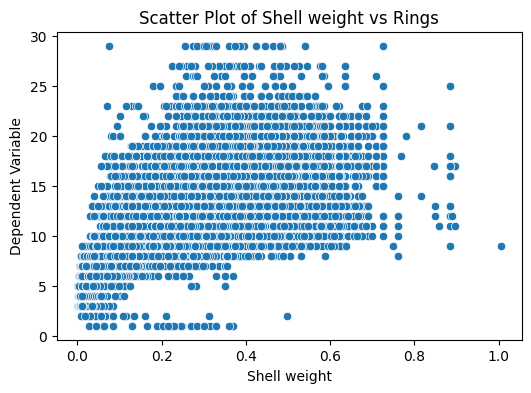

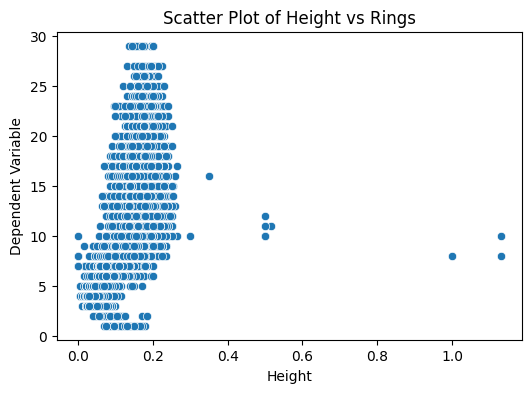

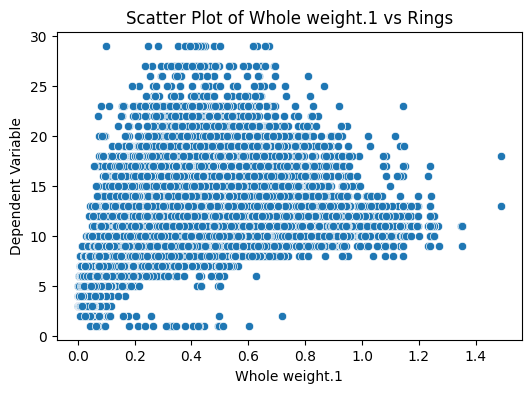

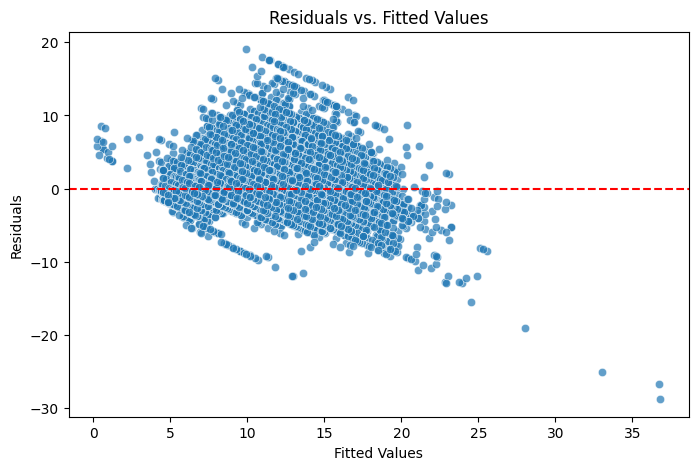

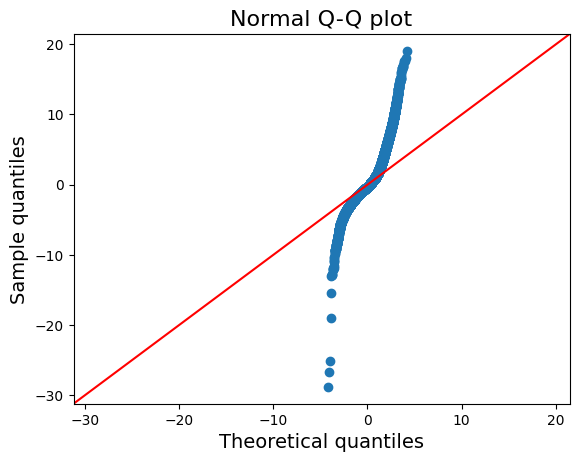

In [14]:
#Linearity Assumption
# Define predictors and variable of intrest
X = TRAIN_NEW[['Shell weight', 'Height', 'Whole weight.1']]  
y = TRAIN_NEW['Rings']

# Scatter plots
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=TRAIN_NEW[col], y=y)
    plt.xlabel(col)
    plt.ylabel('Dependent Variable')
    plt.title(f'Scatter Plot of {col} vs Rings')
    plt.show()

#Equal Variance
fitted_values = model.fittedvalues  
residuals = model.resid  

# Residuals vs. fitted plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

#QQ-plot for residuals
p=sm.qqplot(residuals,line='45')
plt.title('Normal Q-Q plot', fontsize=16);
plt.xlabel('Theoretical quantiles', fontsize=14);
plt.ylabel('Sample quantiles', fontsize=14);


Using model 2 on test data to generate predictions

In [15]:
# One-hot encode the sex column for test data
TEST_NEW2 = pd.get_dummies(TEST, columns=['Sex'], drop_first=True)
TEST_NEW2[['Sex_M', 'Sex_I']] = TEST_NEW2[['Sex_M', 'Sex_I']].astype(int)


X_test = TEST_NEW2[['Shell weight', 'Height', 'Whole weight.1',
               'Sex_M', 'Sex_I']].values

# Add constant 
X_test = sm.add_constant(X_test)

# Generate predictions for rings using model 2 negatives treated as 0
TEST_NEW2['Rings'] = np.maximum(model.predict(X_test).round().astype(int),0)


#Note the added rings column which is predicted with model 1
print(TEST_NEW2.head())

#Code to create the submission file for model 2 commented out
#TEST_NEW2 = TEST_NEW2.iloc[:, [0, -1]]
#TEST_NEW2.to_csv("abalone_submission_model2.csv", index=False)

      id  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   0.645     0.475   0.155        1.2380          0.6185   
1  90616   0.580     0.460   0.160        0.9830          0.4785   
2  90617   0.560     0.420   0.140        0.8395          0.3525   
3  90618   0.570     0.490   0.145        0.8740          0.3525   
4  90619   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  Sex_I  Sex_M  Rings  
0          0.3125        0.3005      0      1      9  
1          0.2195        0.2750      0      1     10  
2          0.1845        0.2405      0      1     10  
3          0.1865        0.2350      0      1     10  
4          0.0670        0.1050      1      0      8  


Formula predicting rings and calculating RMSLE for model 1

In [16]:

X = TRAIN_NEW[['Shell weight', 'Height', 'Diameter', 'Length', 'Whole weight', 'Whole weight.1', 'Whole weight.2',
               'Sex_M', 'Sex_I']].values
y = TRAIN_NEW[['Rings']].values.flatten()  


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


y_pred = np.maximum(y_pred, 0)  

#RMSLE function
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))


rmsle_value = rmsle(y, y_pred)

print("RMSLE:", rmsle_value)
print()
print(f"Predicted Rings = {model.intercept_:.4f} "
      f"+ {model.coef_[0]:.4f} * (Shell weight) "
      f"+ {model.coef_[1]:.4f} * (Height) "
      f"+ {model.coef_[2]:.4f} * (Diameter) "
      f"+ {model.coef_[3]:.4f} * (Length) "
      f"+ {model.coef_[4]:.4f} * (Whole weight) "
      f"+ {model.coef_[5]:.4f} * (Whole weight.1) "
      f"+ {model.coef_[6]:.4f} * (Whole weight.2) "
      f"+ {model.coef_[7]:.4f} * (Sex_M) "
      f"+ {model.coef_[8]:.4f} * (Sex_I)")


RMSLE: 0.16491554663999644

Predicted Rings = 3.8469 + 20.7567 * (Shell weight) + 21.1566 * (Height) + 8.0525 * (Diameter) + -2.0755 * (Length) + 3.7713 * (Whole weight) + -15.8048 * (Whole weight.1) + -7.0188 * (Whole weight.2) + -0.0146 * (Sex_M) + -0.7170 * (Sex_I)


Formula predicting rings and calculating RMSLE for model 2

In [17]:

X = TRAIN_NEW[['Shell weight', 'Height', 'Whole weight.1', 'Sex_M', 'Sex_I']].values
y = TRAIN_NEW[['Rings']].values.flatten() 


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


y_pred = np.maximum(y_pred, 0)  

# RMSLE function
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))


rmsle_value = rmsle(y, y_pred)

print("RMSLE:", rmsle_value)
print()
print(f"Predicted Rings = {model.intercept_:.4f} "
      f"+ {model.coef_[0]:.4f} * (Shell weight) "
      f"+ {model.coef_[1]:.4f} * (Height) "
      f"+ {model.coef_[2]:.4f} * (Whole weight.1) "
      f"+ {model.coef_[3]:.4f} * (Sex_M) "
      f"+ {model.coef_[4]:.4f} * (Sex_I)")



RMSLE: 0.16658247683290447

Predicted Rings = 4.7081 + 25.4666 * (Shell weight) + 27.6294 * (Height) + -12.3639 * (Whole weight.1) + -0.0108 * (Sex_M) + -0.7938 * (Sex_I)
